In [3]:
import os
import numpy as np
from numpy.linalg import eigvalsh
import math
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix, kron
from itertools import product, combinations
import plotly.graph_objects as go
from scipy.linalg import expm, sinm, cosm

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 14})  # Change 12 to the desired font size
# Enable LaTeX rendering in Matplotlib
plt.rc('text', usetex=True)
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm

np.set_printoptions(edgeitems=10)  # Set the number of elements at the beginning and end of each dimension when repr is called
np.set_printoptions(threshold=1000)  # Set the total number of array elements which trigger summarization rather than full repr
np.set_printoptions(precision=4)  # Set the precision for floating point output

ar = np.array
kr = np.kron
T = np.transpose


from MDS import *


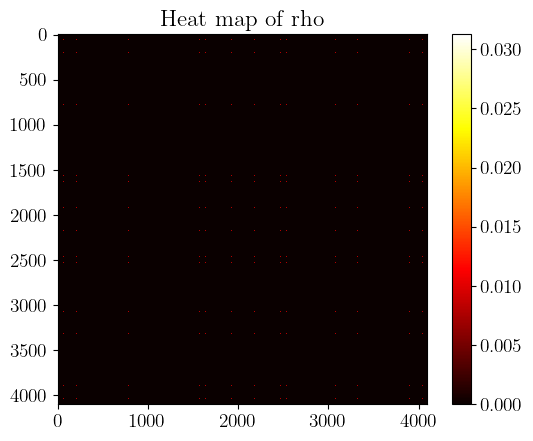

In [4]:
#We create an interesting Hamilotnian to study.
N=12
pauli_z=ar([[1,0],[0,-1]])
pauli_y=ar([[0,-1j],[1j,0]])
pauli_x=ar([[0,1],[1,0]])

id=np.identity(2)
Hadamar=1/np.sqrt(2)*ar([[1,1],[1,-1]])
CNOT=ar([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]])
zero_state=ar([1,0])
#state= [1] + [0] * (2**N-1)
state=zero_state
sup_state=Hadamar@zero_state
bell_state = CNOT@kr(sup_state,zero_state)
#for i in range(N):
#    state=state
#full_state=np.zeros((2**N,2**N), dtype=complex)
full_state_list=[bell_state]
for i in range(int(N/2)-1):
    temp=kr(full_state_list[-1],bell_state)
    full_state_list.append(temp)

Bell1=full_state_list[-1]
Bell2=kr(kr(kr(kr(kr(kr(zero_state,bell_state),bell_state),bell_state),bell_state),bell_state),zero_state)
side =np.identity(2**(N-1))
Had1_extended = np.kron(Hadamar,side)
middle =np.identity(2**(N-2))
P0=ar([[1,0],[0,0]])
P1=ar([[0,0],[0,1]])
CNOT_boundary=kr(kr(P0,middle),id)+kr(kr(P1,middle),pauli_x)
Bell2=Had1_extended@Bell2
Bell2=CNOT_boundary@Bell2
state=1/np.sqrt(2)*(Bell1+Bell2)
rho=get_full_density_matrix(state)
plt.imshow(rho, cmap='hot', interpolation='nearest')
plt.title("Heat map of rho")
plt.colorbar()
plt.show()
